<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [2]:
def load_quickdraw10(path):
  data = np.load('quickdraw10.npz')
  X = data['arr_0']
  y = data['arr_1']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  
  return X_train, y_train, X_test, y_test

In [39]:
X_train, y_train, X_test, y_test = load_quickdraw10(r'U4W2\module2-Train')

In [40]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [4]:
  data = np.load('quickdraw10.npz')
  X = data['arr_0']
  y = data['arr_1']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
##### Your Code Here #####

def create_model(lr,mizer):
  opt = mizer(learning_rate=lr)

  model = Sequential(
      [Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')]
  )

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [6]:
create_model(.01,SGD)

&lt;tensorflow.python.keras.engine.sequential.Sequential at 0x19d230c36c8&gt;

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import seaborn as sns
import pandas as pd

In [8]:
model = create_model(.01,SGD)
batch1 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/10
8375/8375 [==============================] - 11s 1ms/step - loss: 51.3636 - accuracy: 0.0999 - val_loss: 2.4980 - val_accuracy: 0.0992
Epoch 2/10
8375/8375 [==============================] - 10s 1ms/step - loss: 2.3030 - accuracy: 0.1002 - val_loss: 2.4979 - val_accuracy: 0.0994
Epoch 3/10
8375/8375 [==============================] - 11s 1ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.4980 - val_accuracy: 0.0992
Epoch 4/10
8375/8375 [==============================] - 10s 1ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.4982 - val_accuracy: 0.0992
Epoch 5/10
8375/8375 [==============================] - 11s 1ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.4980 - val_accuracy: 0.0992
Epoch 6/10
8375/8375 [==============================] - 10s 1ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.4984 - val_accuracy: 0.0992
Epoch 7/10
8375/8375 [==============================] - 11s 1ms/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.4982 - val_a

In [9]:
model = create_model(.01,SGD)
batch2 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=16,
                       validation_data=(X_test, y_test))

Epoch 1/10
4188/4188 [==============================] - 6s 1ms/step - loss: 33.8081 - accuracy: 0.0990 - val_loss: 2.3060 - val_accuracy: 0.0990
Epoch 2/10
4188/4188 [==============================] - 5s 1ms/step - loss: 2.3572 - accuracy: 0.0997 - val_loss: 2.3035 - val_accuracy: 0.0992
Epoch 3/10
4188/4188 [==============================] - 6s 1ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3035 - val_accuracy: 0.1023
Epoch 4/10
4188/4188 [==============================] - 6s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3036 - val_accuracy: 0.0992
Epoch 5/10
4188/4188 [==============================] - 5s 1ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3036 - val_accuracy: 0.0992
Epoch 6/10
4188/4188 [==============================] - 5s 1ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3036 - val_accuracy: 0.0992
Epoch 7/10
4188/4188 [==============================] - 5s 1ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3036 - val_accuracy

In [10]:
model = create_model(.01,SGD)
batch3 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 1ms/step - loss: 5.3138 - accuracy: 0.1004 - val_loss: 2.3036 - val_accuracy: 0.0995
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3030 - accuracy: 0.0991 - val_loss: 2.3036 - val_accuracy: 0.0993
Epoch 3/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3033 - val_accuracy: 0.0993
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3033 - val_accuracy: 0.0993
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3025 - accuracy: 0.0991 - val_loss: 2.3033 - val_accuracy: 0.0993
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3033 - val_accuracy: 0.0993
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3025 - accuracy: 0.0979 - val_loss: 2.3032 - val_accuracy:

In [11]:
model = create_model(.01,SGD)
batch4 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=64,
                       validation_data=(X_test, y_test))

Epoch 1/10
1047/1047 [==============================] - 2s 2ms/step - loss: 8.5439 - accuracy: 0.0976 - val_loss: 2.3047 - val_accuracy: 0.0992
Epoch 2/10
1047/1047 [==============================] - 2s 2ms/step - loss: 2.3044 - accuracy: 0.0997 - val_loss: 2.3047 - val_accuracy: 0.0992
Epoch 3/10
1047/1047 [==============================] - 2s 2ms/step - loss: 2.3029 - accuracy: 0.0983 - val_loss: 2.3047 - val_accuracy: 0.0990
Epoch 4/10
1047/1047 [==============================] - 2s 2ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3047 - val_accuracy: 0.0990
Epoch 5/10
1047/1047 [==============================] - 2s 2ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3047 - val_accuracy: 0.0990
Epoch 6/10
1047/1047 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3047 - val_accuracy: 0.0992
Epoch 7/10
1047/1047 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3047 - val_accuracy:

In [12]:
model = create_model(.01,SGD)
batch5 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=128,
                       validation_data=(X_test, y_test))

Epoch 1/10
524/524 [==============================] - 1s 2ms/step - loss: 10.5854 - accuracy: 0.0984 - val_loss: 2.3050 - val_accuracy: 0.0994
Epoch 2/10
524/524 [==============================] - 1s 2ms/step - loss: 2.3050 - accuracy: 0.1000 - val_loss: 2.3050 - val_accuracy: 0.0990
Epoch 3/10
524/524 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3049 - val_accuracy: 0.0990
Epoch 4/10
524/524 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3049 - val_accuracy: 0.0994
Epoch 5/10
524/524 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3049 - val_accuracy: 0.0994
Epoch 6/10
524/524 [==============================] - 1s 2ms/step - loss: 2.3025 - accuracy: 0.0978 - val_loss: 2.3049 - val_accuracy: 0.0992
Epoch 7/10
524/524 [==============================] - 1s 2ms/step - loss: 2.3025 - accuracy: 0.0994 - val_loss: 2.3049 - val_accuracy: 0.0992
Epoch

In [13]:
batch_sizes = []

for exp, result in zip([batch1,batch2,batch3,batch4,batch5], ["8_","16_","32_","64_","128_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,51.363560,0.099896,2.497977,0.099242,0,8_
1,2.302952,0.100239,2.497950,0.099394,1,8_
2,2.302875,0.099030,2.497955,0.099242,2,8_
3,2.302898,0.099134,2.498230,0.099242,3,8_
4,2.302941,0.098881,2.497959,0.099242,4,8_


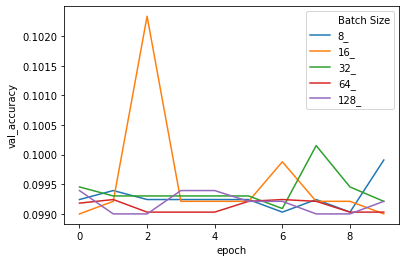

In [14]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [15]:
model = create_model(.0001,SGD)
learn1 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 1ms/step - loss: 4.1480 - accuracy: 0.2530 - val_loss: 2.0759 - val_accuracy: 0.2867
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.9781 - accuracy: 0.3162 - val_loss: 1.9150 - val_accuracy: 0.3334
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 1.8679 - accuracy: 0.3472 - val_loss: 1.8394 - val_accuracy: 0.3544
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.8064 - accuracy: 0.3634 - val_loss: 1.7939 - val_accuracy: 0.3696
Epoch 5/10
2094/2094 [==============================] - 3s 2ms/step - loss: 1.7651 - accuracy: 0.3747 - val_loss: 1.7598 - val_accuracy: 0.3768
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.7333 - accuracy: 0.3822 - val_loss: 1.7329 - val_accuracy: 0.3867
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.7059 - accuracy: 0.3904 - val_loss: 1.7090 - val_accuracy:

In [16]:
model = create_model(.001,SGD)
learn2 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.1123 - accuracy: 0.3302 - val_loss: 1.7076 - val_accuracy: 0.4133
Epoch 2/10
2094/2094 [==============================] - 3s 2ms/step - loss: 1.5935 - accuracy: 0.4259 - val_loss: 1.5329 - val_accuracy: 0.4248
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 1.4585 - accuracy: 0.4774 - val_loss: 1.4114 - val_accuracy: 0.5150
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.3550 - accuracy: 0.5332 - val_loss: 1.3497 - val_accuracy: 0.5278
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.2683 - accuracy: 0.5716 - val_loss: 1.2371 - val_accuracy: 0.6036
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.1918 - accuracy: 0.6079 - val_loss: 1.1892 - val_accuracy: 0.6255
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.1289 - accuracy: 0.6372 - val_loss: 1.1361 - val_accuracy:

In [17]:
model = create_model(.01,SGD)
learn3 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 4s 2ms/step - loss: 3.5741 - accuracy: 0.0983 - val_loss: 2.3056 - val_accuracy: 0.1002
Epoch 2/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3042 - accuracy: 0.1006 - val_loss: 2.3063 - val_accuracy: 0.0992
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3287 - accuracy: 0.1005 - val_loss: 2.3062 - val_accuracy: 0.0992
Epoch 4/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3062 - val_accuracy: 0.1001
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3062 - val_accuracy: 0.0991
Epoch 6/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0968 - val_loss: 2.3062 - val_accuracy: 0.0991
Epoch 7/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3025 - accuracy: 0.0997 - val_loss: 2.3062 - val_accuracy:

In [18]:
model = create_model(.1,SGD)
learn4 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 372821.5625 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3373 - accuracy: 0.0996 - val_loss: 2.3031 - val_accuracy: 0.0999
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3034 - accuracy: 0.0976 - val_loss: 2.3034 - val_accuracy: 0.1001
Epoch 4/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.1004 - val_loss: 2.3033 - val_accuracy: 0.0999
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3034 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.0992
Epoch 6/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3034 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.1023
Epoch 7/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3032 - accuracy: 0.1002 - val_loss: 2.3035 - val_accu

In [19]:
model = create_model(1,SGD)
learn5 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 764760668766208.0000 - accuracy: 0.0986 - val_loss: 122.0293 - val_accuracy: 0.0994
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 5213.4180 - accuracy: 0.0991 - val_loss: 121.8846 - val_accuracy: 0.0990
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3100 - accuracy: 0.1020 - val_loss: 121.8786 - val_accuracy: 0.1001
Epoch 4/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3100 - accuracy: 0.1007 - val_loss: 121.8873 - val_accuracy: 0.0994
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3100 - accuracy: 0.1003 - val_loss: 121.8789 - val_accuracy: 0.1023
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3102 - accuracy: 0.0983 - val_loss: 121.8776 - val_accuracy: 0.1009
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3104 - accuracy: 0.0982 - val

In [24]:
import seaborn as sns
import pandas as pd

learning_rates = []

for exp, result in zip([learn1,learn2,learn3,learn4,learn5], [".0001_",".001_",".01_",".1_","1_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,4.148036,0.252970,2.075902,0.286697,0,.0001_
1,1.978067,0.316209,1.915031,0.333424,1,.0001_
2,1.867889,0.347239,1.839421,0.354364,2,.0001_
3,1.806443,0.363418,1.793899,0.369606,3,.0001_
4,1.765117,0.374672,1.759789,0.376818,4,.0001_


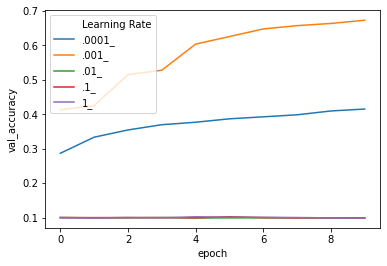

In [25]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [32]:
model = create_model(.01,SGD)
optim1 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 10.3920 - accuracy: 0.1000 - val_loss: 2.3185 - val_accuracy: 0.0994
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3167 - accuracy: 0.0998 - val_loss: 2.3291 - val_accuracy: 0.0992
Epoch 3/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3292 - val_accuracy: 0.0992
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3291 - val_accuracy: 0.0990
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3291 - val_accuracy: 0.0990
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3292 - val_accuracy: 0.0990
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3291 - val_accuracy

In [33]:
from tensorflow.keras.optimizers import Adam
model = create_model(.01,Adam)
optim2 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.5940 - accuracy: 0.0982 - val_loss: 2.3055 - val_accuracy: 0.1009
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3052 - accuracy: 0.0993 - val_loss: 2.3043 - val_accuracy: 0.0992
Epoch 3/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3106 - accuracy: 0.1010 - val_loss: 2.3041 - val_accuracy: 0.1001
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3039 - accuracy: 0.1000 - val_loss: 2.3047 - val_accuracy: 0.0992
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3040 - accuracy: 0.0995 - val_loss: 2.3037 - val_accuracy: 0.0992
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3038 - accuracy: 0.0990 - val_loss: 2.3039 - val_accuracy: 0.1001
Epoch 7/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.3040 - accuracy: 0.0984 - val_loss: 2.3059 - val_accuracy:

In [34]:
from tensorflow.keras.optimizers import Adamax
model = create_model(.01,Adamax)
optim3 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.5009 - accuracy: 0.2068 - val_loss: 2.0081 - val_accuracy: 0.2320
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.7432 - accuracy: 0.3539 - val_loss: 1.4947 - val_accuracy: 0.4659
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 1.4181 - accuracy: 0.4822 - val_loss: 1.3149 - val_accuracy: 0.5300
Epoch 4/10
2094/2094 [==============================] - 3s 2ms/step - loss: 1.2830 - accuracy: 0.5379 - val_loss: 1.2043 - val_accuracy: 0.5720
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.1841 - accuracy: 0.5862 - val_loss: 1.1020 - val_accuracy: 0.6353
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.0753 - accuracy: 0.6487 - val_loss: 1.0915 - val_accuracy: 0.6442
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 1.0463 - accuracy: 0.6602 - val_loss: 1.0545 - val_accuracy:

In [38]:
from tensorflow.keras.optimizers import Ftrl
model = create_model(.01,Ftrl)
optim4 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 4s 2ms/step - loss: 1.4280 - accuracy: 0.5696 - val_loss: 1.0582 - val_accuracy: 0.6728
Epoch 2/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.9150 - accuracy: 0.7174 - val_loss: 0.8658 - val_accuracy: 0.7313
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.8135 - accuracy: 0.7511 - val_loss: 0.8219 - val_accuracy: 0.7474
Epoch 4/10
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7716 - accuracy: 0.7632 - val_loss: 0.8018 - val_accuracy: 0.7565
Epoch 5/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.7457 - accuracy: 0.7709 - val_loss: 0.7881 - val_accuracy: 0.7591
Epoch 6/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.7283 - accuracy: 0.7768 - val_loss: 0.7791 - val_accuracy: 0.7580
Epoch 7/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.7146 - accuracy: 0.7809 - val_loss: 0.7694 - val_accuracy:

In [41]:
from tensorflow.keras.optimizers import Adadelta
model = create_model(.01,Adadelta)
optim5 = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 31.7851 - accuracy: 0.1620 - val_loss: 12.3805 - val_accuracy: 0.2229
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 7.6611 - accuracy: 0.2354 - val_loss: 4.7537 - val_accuracy: 0.2256
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 3.6092 - accuracy: 0.2174 - val_loss: 2.9632 - val_accuracy: 0.2128
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.6795 - accuracy: 0.2229 - val_loss: 2.5036 - val_accuracy: 0.2197
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.3934 - accuracy: 0.2292 - val_loss: 2.3142 - val_accuracy: 0.2306
Epoch 6/10
2094/2094 [==============================] - 3s 2ms/step - loss: 2.2541 - accuracy: 0.2375 - val_loss: 2.2123 - val_accuracy: 0.2348
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 2.1692 - accuracy: 0.2689 - val_loss: 2.1461 - val_accurac

In [44]:
import seaborn as sns
import pandas as pd

optimizers = []

for exp, result in zip([optim1,optim2,optim3,optim4,optim5], ["SGD","Adam","Adamax","Ftrl","Adadelta"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['optimizer'] = result

  optimizers.append(df)

df = pd.concat(optimizers)
df['optimizer'] = df['optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,optimizer
0,10.391965,0.100015,2.318525,0.099364,0,SGD
1,2.316705,0.099821,2.329137,0.099212,1,SGD
2,2.302565,0.099716,2.329174,0.099212,2,SGD
3,2.302590,0.097507,2.329109,0.099000,3,SGD
4,2.302585,0.099896,2.329140,0.099000,4,SGD


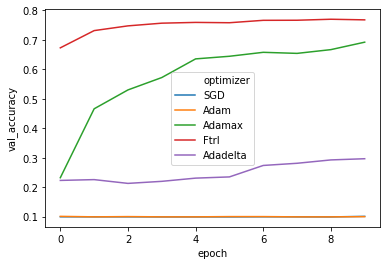

In [46]:
sns.lineplot(x='epoch', y='val_accuracy', hue='optimizer', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


